Medie:  0.088
Variance:  2.096256


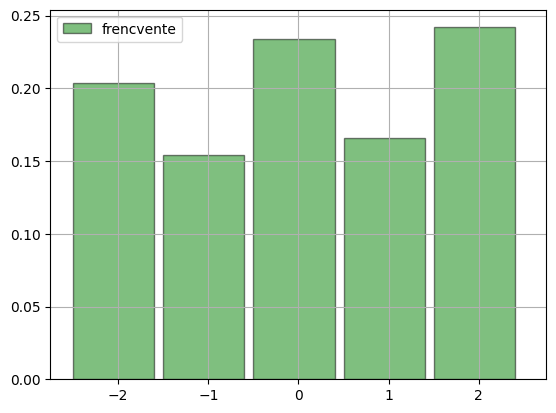

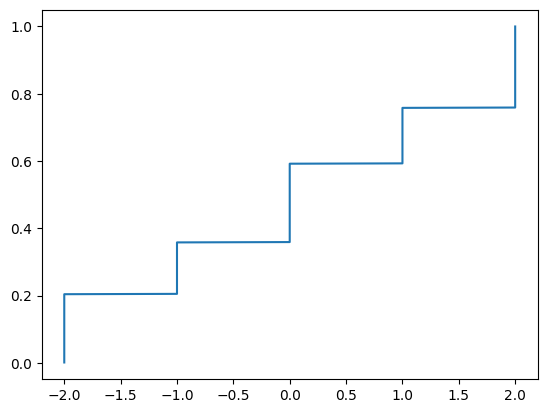

In [9]:
from itertools import permutations

from numpy import random, mean, var, sort, arange
from matplotlib.pyplot import hist, grid, show, legend, xticks, bar, plot

x = [-2, -1, 0, 1, 2]
p = [0.2, 0.15, 0.25, 0.14, 0.26]

X = []
sample_size = 1000
for _ in range(sample_size):
    X.append(random.choice(x, p=p))
    
print('Medie: ', mean(X))
print('Variance: ', var(X))
    
data = X
bin_edges = [k + 0.5 for k in range(-3, 3)]
hist(data, bin_edges, density=True, alpha=0.5, color='green', edgecolor='black', width=0.9, label = 'frencvente')

legend(loc='best')
grid()
show()

sorted_val = sort(X)
f_cdf = arange(1, 1001)/1000

plot(sorted_val, f_cdf)
show()

0.3332501650641494
(0.3333333333333333, 3.700743415417188e-15)


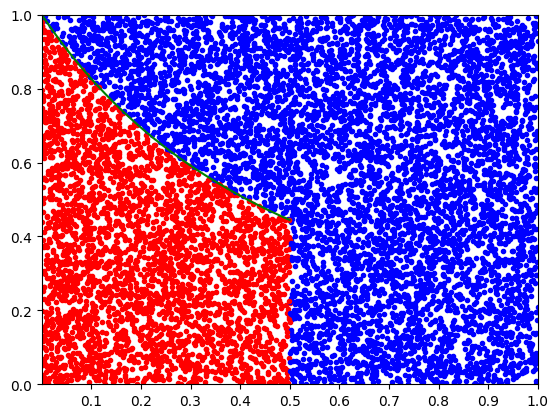

Estimare P("sub f"):  0.3301
P("sub f"):  0.3333333333333333


In [34]:
from scipy.stats import uniform
from scipy.integrate import quad
from numpy import mean, linspace
from matplotlib.pyplot import axis, show, plot, xticks
from random import random

f = lambda x: 1/(x + 1)**2
a = 0
b = 0.5
U = uniform.rvs(loc = a, scale = b - a, size = 10000)
X = [f(u) for u in U]
#estimare
print(mean(X) * (b - a))
#teoretica
valoareIntegrala = quad(f, a, b)
print(valoareIntegrala)

#PATRAT 

axis((0,1,0,1))
xticks([i/10 for i in range(1,11)])
N = 10000

puncteSubF = 0
for _ in range(N):
    punct = (random(), random())
    if punct[1] < f(punct[0]) and punct[0] < 0.5:
        plot(punct[0], punct[1], 'r.')
        puncteSubF += 1
    else:
        plot(punct[0], punct[1], 'b.')
        
#am reprezentat si functia
interval = linspace(0, 0.5, 1000)
plot(interval, f(interval), color='g')
show()

print('Estimare P("sub f"): ', puncteSubF/N)
print('P("sub f"): ', valoareIntegrala[0])


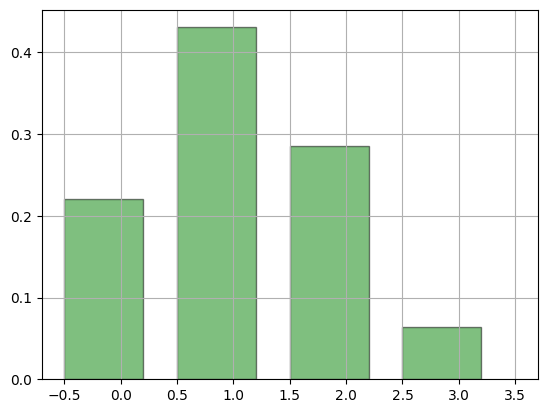

Estimare P(2):  0.2849
0.2906764539808019
0.2906764539808019


In [53]:
# urna 4 bile albe 6 negre
# se arunca 4 zaruri. daca suma < 12 se face extragere fara returnare, altfel cu returnare (3 bile)
# Y = nr bile albe extrase
# 10000 simulari Y + hist
# P(Y = 2)

from scipy.stats import randint, hypergeom, binom
from numpy import random, mean
from matplotlib.pyplot import hist, grid, show, legend
from itertools import permutations, combinations

Y = []
sample_size = 10000

urna = ['alba']*4 + ['neagra']*6

suma_zaruri = sum(randint.rvs(low=1,high=7,size=4))
for _ in range(sample_size):
    # print(suma_zaruri)
    if suma_zaruri < 12:
        bile_extrase = list(random.choice(urna, size=3, replace=False))
        Y.append(bile_extrase.count('alba'))
    else:
        bile_extrase = list(random.choice(urna, size=3, replace=True))
        Y.append(bile_extrase.count('alba'))

bin_edges = [k + 0.5 for k in range(-1,4)]
hist(Y, bin_edges, density=True, width=0.7, alpha=0.5, color='green', edgecolor='black', label='frecvente')

grid()
show()
    
# p estimata
y_2 = [y for y in Y if y == 2]
print('Estimare P(2): ', len(y_2)/len(Y))

zar = [1, 2, 3, 4, 5, 6] * 4

lista_sume = list(combinations(zar, 4))
sume = [sum(list(s)) for s in lista_sume]
numar_sume_mai_mici_12 = len([s for s in sume if s < 12])

p = numar_sume_mai_mici_12/len(lista_sume)

print(hypergeom.pmf(2,10,4,3)*p + binom.pmf(2,3,4/10)*(1-p))

lista_sume = list(permutations(zar, 4))
sume = [sum(list(s)) for s in lista_sume]
numar_sume_mai_mici_12 = len([s for s in sume if s < 12])

p = numar_sume_mai_mici_12/len(lista_sume)

print(hypergeom.pmf(2,10,4,3)*p + binom.pmf(2,3,4/10)*(1-p))
